In [1]:
import numpy as np 
import pandas as pd 

# Questão 1
---
Considere a base de dados disponível em

https://raw.githubusercontent.com/jlyang1990/Spark_Python_Do_Big_Data_Analytics/master/auto-data.csv. Essa base tem os seguintes atributos:
  
Fabricante (MAKE)  
Combustível (FUELTYPE)  
Tipo de Apiração (ASPIRE)  
Quantidade de Portas (DOORS)  
Carroceria (BODY)  
Tração (DRIVE)  
Número de cilindros (CYLINDERS)  
Potência (HP)  
Rotações por minuto (RPM)  
Consumo na cidade (MPG-CITY)  
Consumo na estrada (MPG-HWY)  
Preço (PRICE)  
Considerando os atributos numéricos, o atributo que tem maior correlação positiva com o preço (PRICE) é o 
(_____) Já o atributo que tem maior correlação negativa com a potência (HP) é o (_____) O atributo numérico com menor correlação com os demais é (_____)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jlyang1990/Spark_Python_Do_Big_Data_Analytics/master/auto-data.csv")
df.head(2)

,MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE
0,subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118
1,chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151


In [10]:
print("HP, MPG-CITY, RPM")
df.corr()

HP, MPG-CITY, RPM


,HP,RPM,MPG-CITY,MPG-HWY,PRICE
HP,1.000000,0.103574,-0.821960,-0.803658,0.811953
RPM,0.103574,1.000000,-0.107648,-0.050632,-0.101319
MPG-CITY,-0.821960,-0.107648,1.000000,0.972407,-0.692948
MPG-HWY,-0.803658,-0.050632,0.972407,1.000000,-0.708659
PRICE,0.811953,-0.101319,-0.692948,-0.708659,1.000000


# Questão 2
---
Considere a base de dados disponível em

https://raw.githubusercontent.com/jlyang1990/Spark_Python_Do_Big_Data_Analytics/master/auto-data.csv. Essa base tem os seguintes atributos:
  
Fabricante (MAKE)  
Combustível (FUELTYPE)  
Tipo de Apiração (ASPIRE)  
Quantidade de Portas (DOORS)  
Carroceria (BODY)  
Tração (DRIVE)  
Número de cilindros (CYLINDERS)  
Potência (HP)  
Rotações por minuto (RPM)  
Consumo na cidade (MPG-CITY)  
Consumo na estrada (MPG-HWY)  
Preço (PRICE)  

Considerando os atributos tipo de combustível (FUELTYPE) e número de portas (DOORS), podemos dizer que a proporção de veículos com 4 portas é maior para o tipo de combustível (_) O tipo de carroceria com maior preço médio é o (_) Já o tipo de tração com melhor desempenho na cidade (maior MPG-CITY)  é o (_)



In [20]:
print("diesel")
x = df.groupby(["FUELTYPE"])['DOORS'].describe()
x['pct'] = (x['freq']/x['count']*100)
x

diesel


,count,unique,top,freq,pct
FUELTYPE,,,,,
diesel,19,2,four,16,84.2105
gas,178,2,four,96,53.9326


In [23]:
print("hardtop")
df.groupby(['BODY'])['PRICE'].mean().sort_values()

hardtop


BODY
hatchback       9958.373134
wagon          12500.166667
sedan          14563.739130
convertible    21890.500000
hardtop        22208.500000
Name: PRICE, dtype: float64

In [27]:
print("fwd")
df.groupby(['DRIVE'])['MPG-CITY'].mean().sort_values()

fwd


DRIVE
rwd    20.626667
4wd    24.000000
fwd    28.210526
Name: MPG-CITY, dtype: float64

# Questão 3

In [28]:
import pandas as pd
from io import StringIO
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [29]:
tmp = StringIO("""STN_NAME,YISHUN_MRT_STATION,PASIR_RIS_MRT_STATION,JURONG_EAST_MRT_STATION,TUAS_LINK_MRT_STATION,BENCOOLEN_MRT_STATION,PUNGGOL_MRT_STATION,MARINA_BAY_MRT_STATION,DHOBY_GHAUT_MRT_STATION,ROCHOR_MRT_STATION,UPPER_CHANGI_MRT_STATION
YISHUN_MRT_STATION,0,14165.8028309003,14826.8234223324,24144.58370996,14539.8253530485,7955.17551381608,17097.0983148766,14495.1289232166,14014.7715236133,17091.9107945143
PASIR_RIS_MRT_STATION,14165.8028309003,0,23451.9973340811,34950.8745491473,13721.3248153691,6306.08987347808,14983.0092441387,14095.3770091796,13209.4818715068,3712.4090725179
JURONG_EAST_MRT_STATION,14826.8234223324,23451.9973340811,0,11758.6400823558,12613.5429467971,19455.8643741636,14047.8304857995,12175.0907736314,12676.1241992151,24411.4671044188
TUAS_LINK_MRT_STATION,24144.58370996,34950.8745491473,11758.6400823558,0,24202.2573770791,30351.6324743735,25305.1676395598,23749.9738806756,24325.8635170677,36124.0377992668
BENCOOLEN_MRT_STATION,14539.8253530485,13721.3248153691,12613.5429467971,24202.2573770791,0,13024.8987292155,2565.66801256045,461.323513564845,602.910926685915,13240.7330980557
PUNGGOL_MRT_STATION,7955.17551381608,6306.08987347808,19455.8643741636,30351.6324743735,13024.8987292155,0,15129.4446906282,13237.1986125019,12423.6186258471,9588.13908018742
MARINA_BAY_MRT_STATION,17097.0983148766,14983.0092441387,14047.8304857995,25305.1676395598,2565.66801256045,15129.4446906282,0,2695.76728986719,3084.57512743706,13883.5893006481
DHOBY_GHAUT_MRT_STATION,14495.1289232166,14095.3770091796,12175.0907736314,23749.9738806756,461.323513564845,13237.1986125019,2695.76728986719,0,887.79255969772,13673.2848886229
ROCHOR_MRT_STATION,14014.7715236133,13209.4818715068,12676.1241992151,24325.8635170677,602.910926685915,12423.6186258471,3084.57512743706,887.79255969772,0,12836.5477607036
UPPER_CHANGI_MRT_STATION,17091.9107945143,3712.4090725179,24411.4671044188,36124.0377992668,13240.7330980557,9588.13908018742,13883.5893006481,13673.2848886229,12836.5477607036,0""")

distancias = pd.read_csv(tmp,index_col=0)

In [30]:
tmp = StringIO(""" STN_NAME,YISHUN_MRT_STATION,PASIR_RIS_MRT_STATION,JURONG_EAST_MRT_STATION,TUAS_LINK_MRT_STATION,BENCOOLEN_MRT_STATION,PUNGGOL_MRT_STATION,MARINA_BAY_MRT_STATION,DHOBY_GHAUT_MRT_STATION,ROCHOR_MRT_STATION,UPPER_CHANGI_MRT_STATION
BENCOOLEN_MRT_STATION,0,476,2359,707,2347,1944,640,3593,1848,2245
DHOBY_GHAUT_MRT_STATION,476,0,2009,363,1970,1484,334,3219,2173,1820
JURONG_EAST_MRT_STATION,2359,2009,0,1883,3677,3422,2044,1738,3665,2411
MARINA_BAY_MRT_STATION,707,363,1883,0,2169,1848,528,3118,2441,2127
PASIR_RIS_MRT_STATION,2347,1970,3677,2169,0,2599,1819,4912,1334,3734
PUNGGOL_MRT_STATION,1944,1484,3422,1848,2599,0,1552,4632,3174,2194
ROCHOR_MRT_STATION,640,334,2044,528,1819,1552,0,3318,1998,1758
TUAS_LINK_MRT_STATION,3593,3219,1738,3118,4912,4632,3318,0,4941,3659
UPPER_CHANGI_MRT_STATION,1848,2173,3665,2441,1334,3174,1998,4941,0,3945
YISHUN_MRT_STATION,2245,1820,2411,2127,3734,2194,1758,3659,3945,0 """)
tempo_viagem = pd.read_csv(tmp,index_col=0)

In [31]:
mds = MDS(dissimilarity='precomputed',random_state=42)
mds_distancias = mds.fit_transform(distancias)
mds_tempo_viagem = mds.fit_transform(tempo_viagem)

In [32]:
mds_distancias /= mds_distancias.max()
mds_tempo_viagem /= mds_tempo_viagem.max()

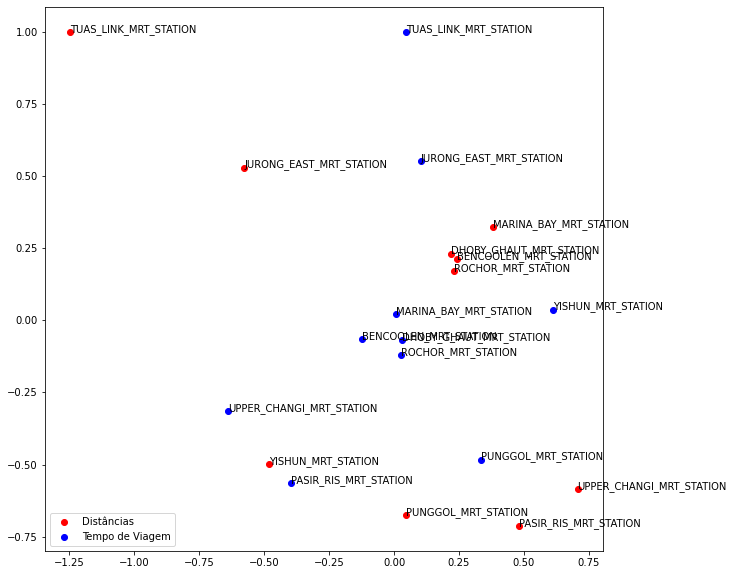

In [33]:
fig = plt.figure(figsize=(10,10))

plt.scatter(mds_distancias[:,0],mds_distancias[:,1],color = 'red', label="Distâncias")
for i in range(len(mds_distancias)):
  plt.text(mds_distancias[i,0],mds_distancias[i,1],distancias.index[i])

plt.scatter(mds_tempo_viagem[:,0],mds_tempo_viagem[:,1],color = 'blue', label="Tempo de Viagem")
for i in range(len(mds_tempo_viagem)):
  plt.text(mds_tempo_viagem[i,0],mds_tempo_viagem[i,1],tempo_viagem.index[i])

plt.legend(loc='lower left')

In [57]:
distTempo = pd.DataFrame(mds_tempo_viagem,columns=['tempo_x','tempo_y'],index=tempo_viagem.index)
distDist = pd.DataFrame(mds_distancias,columns=['dist_x','dist_y'],index=distancias.index)

df = pd.merge(distDist,distTempo,left_index=True,right_index=True)
df.apply(lambda x: cdist([[x['dist_x'],x['dist_y']]],[[x['tempo_x'],x['tempo_y']]]).ravel()[0],axis=1).sort_values()

PUNGGOL_MRT_STATION         0.348489
DHOBY_GHAUT_MRT_STATION     0.351740
ROCHOR_MRT_STATION          0.356873
BENCOOLEN_MRT_STATION       0.458154
MARINA_BAY_MRT_STATION      0.479993
JURONG_EAST_MRT_STATION     0.678506
PASIR_RIS_MRT_STATION       0.892292
YISHUN_MRT_STATION          1.216402
TUAS_LINK_MRT_STATION       1.292609
UPPER_CHANGI_MRT_STATION    1.373523
dtype: float64

# Questão 4

In [66]:
#df = pd.read_csv("simpson.csv")
df.groupby(['a3']).corr()

x         y
a3                      
v1 x  1.000000 -0.049674
   y -0.049674  1.000000
v2 x  1.000000 -0.154721
   y -0.154721  1.000000
v3 x  1.000000 -0.012382
   y -0.012382  1.000000